In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency


## Go to the /users/pgrad/mamu/Documents/first/ directory 


In [37]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os

#os.chdir('/users/pgrad/mamu/Documents/first/')
os.chdir('D:/maxim/Dissertation/first')

## Load datasets


In [38]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data = pd.read_csv('./ctgan/results/synthetic_data_ctgan.csv')

## Feature Engineering

In [39]:
# Print the length of the datasets
print('Original data length:', len(original_data))
print('Generated data length:', len(generated_data))

# Subset the datasets to the minimum length
min_len = min(len(original_data), len(generated_data))
original_data = original_data.iloc[:min_len]
generated_data = generated_data.iloc[:min_len]

Original data length: 348
Generated data length: 348


In [40]:
# List of possible values for the categorical column ' Disease' from both datasets
original_disease_values = original_data['Disease'].unique()
generated_disease_values = generated_data['Disease'].unique()

# Print the list of possible values for the categorical column ' Disease' from both datasets
print('Original Disease Values:', original_disease_values)
print('Generated Disease Values:', generated_disease_values)

Original Disease Values: ['Influenza' 'Common Cold' 'Eczema' 'Asthma' 'Hyperthyroidism'
 'Allergic Rhinitis' 'Anxiety Disorders' 'Diabetes' 'Gastroenteritis'
 'Pancreatitis' 'Rheumatoid Arthritis' 'Depression' 'Liver Cancer'
 'Stroke' 'Urinary Tract Infection' 'Dengue Fever' 'Hepatitis'
 'Kidney Cancer' 'Migraine' 'Muscular Dystrophy' 'Sinusitis'
 'Ulcerative Colitis' 'Bipolar Disorder' 'Bronchitis' 'Cerebral Palsy'
 'Colorectal Cancer' 'Hypertensive Heart Disease' 'Multiple Sclerosis'
 'Myocardial Infarction (Heart...' 'Urinary Tract Infection (UTI)'
 'Osteoporosis' 'Pneumonia' 'Atherosclerosis'
 'Chronic Obstructive Pulmonary...' 'Epilepsy' 'Hypertension'
 'Obsessive-Compulsive Disorde...' 'Psoriasis' 'Rubella' 'Cirrhosis'
 'Conjunctivitis (Pink Eye)' 'Liver Disease' 'Malaria' 'Spina Bifida'
 'Kidney Disease' 'Osteoarthritis' 'Klinefelter Syndrome' 'Acne'
 'Brain Tumor' 'Cystic Fibrosis' 'Glaucoma' 'Rabies' 'Chickenpox'
 'Coronary Artery Disease' 'Eating Disorders (Anorexia,...' 'Fib

In [41]:
# import the categories dictionary from json
import json

with open('./evaluation/tools/categories.json') as f:
    categories = json.load(f)

# Initialize the category counts
categories_count = {
    "Respiratory": 0,
    "Skin": 0,
    "Endocrine and Metabolic": 0,
    "Mental and Behavioral": 0,
    "Cardiovascular": 0,
    "Gastrointestinal": 0,
    "Cancers": 0,
    "Neurological": 0,
    "Musculoskeletal": 0,
    "Infectious": 0,
    "Urinary and Reproductive": 0,
    "Blood": 0,
    "Genetic": 0,
    "Miscellaneous": 0
}

# Function to classify diseases into categories and update counts
def classify_disease(disease):
    for category, diseases in categories.items():
        if disease in diseases:
            categories_count[category] += 1
            return category
    return 'Miscellaneous'


## Descriptive statistics comparison


#### Check if some of the diseases are new in the generated dataset


In [42]:
# Check if some of the diseases are new in the generated dataset
new_diseases = [disease for disease in generated_disease_values if disease not in original_disease_values]
print(f'New diseases in the generated dataset: \n {new_diseases}')

New diseases in the generated dataset: 
 []


In [43]:
# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

### General description of both datasets

In [44]:
# Descriptive statistics comparison
print("Original Data Description:\n", original_data.describe())
print("Generated Data Description:\n", generated_data.describe())

# Descriptive statistics comparison for categorical columns
print("Original Data Description for Categorical Columns:\n", original_data.describe(include=['object']))
print("Generated Data Description for Categorical Columns:\n", generated_data.describe(include=['object']))


Original Data Description:
               Age
count  348.000000
mean    46.198276
std     12.891849
min     19.000000
25%     35.000000
50%     45.000000
75%     55.000000
max     90.000000
Generated Data Description:
               Age
count  348.000000
mean    39.137931
std     14.469224
min     16.000000
25%     29.000000
50%     36.000000
75%     47.000000
max     86.000000
Original Data Description for Categorical Columns:
        Disease Fever Cough Fatigue Difficulty Breathing  Gender  \
count      348   348   348     348                  348     348   
unique     116     2     2       2                    2       2   
top     Asthma   Yes    No     Yes                   No  Female   
freq        23   174   181     241                  260     175   

       Blood Pressure Cholesterol Level Outcome Variable Disease Category  
count             348               348              348              348  
unique              3                 3                2               14  
top

### Plot histograms

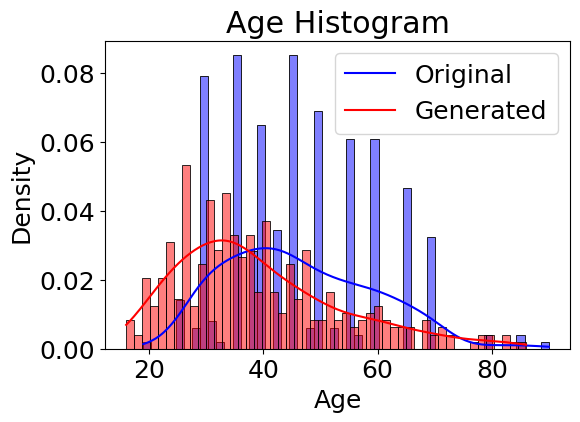

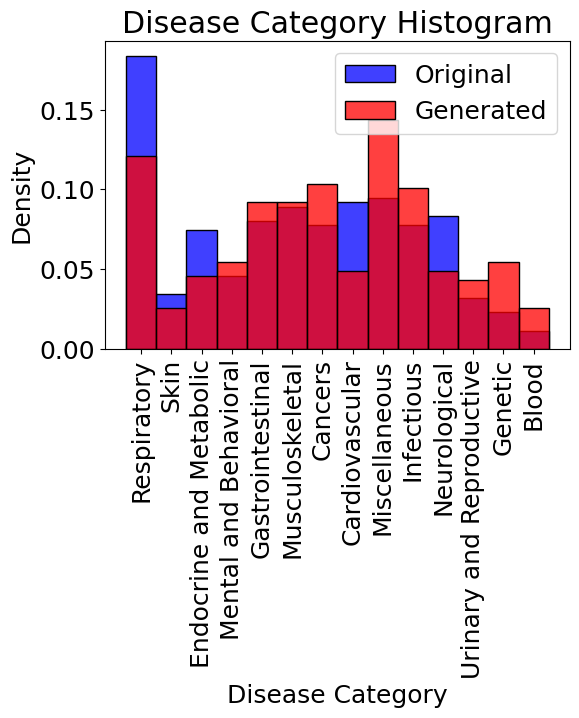

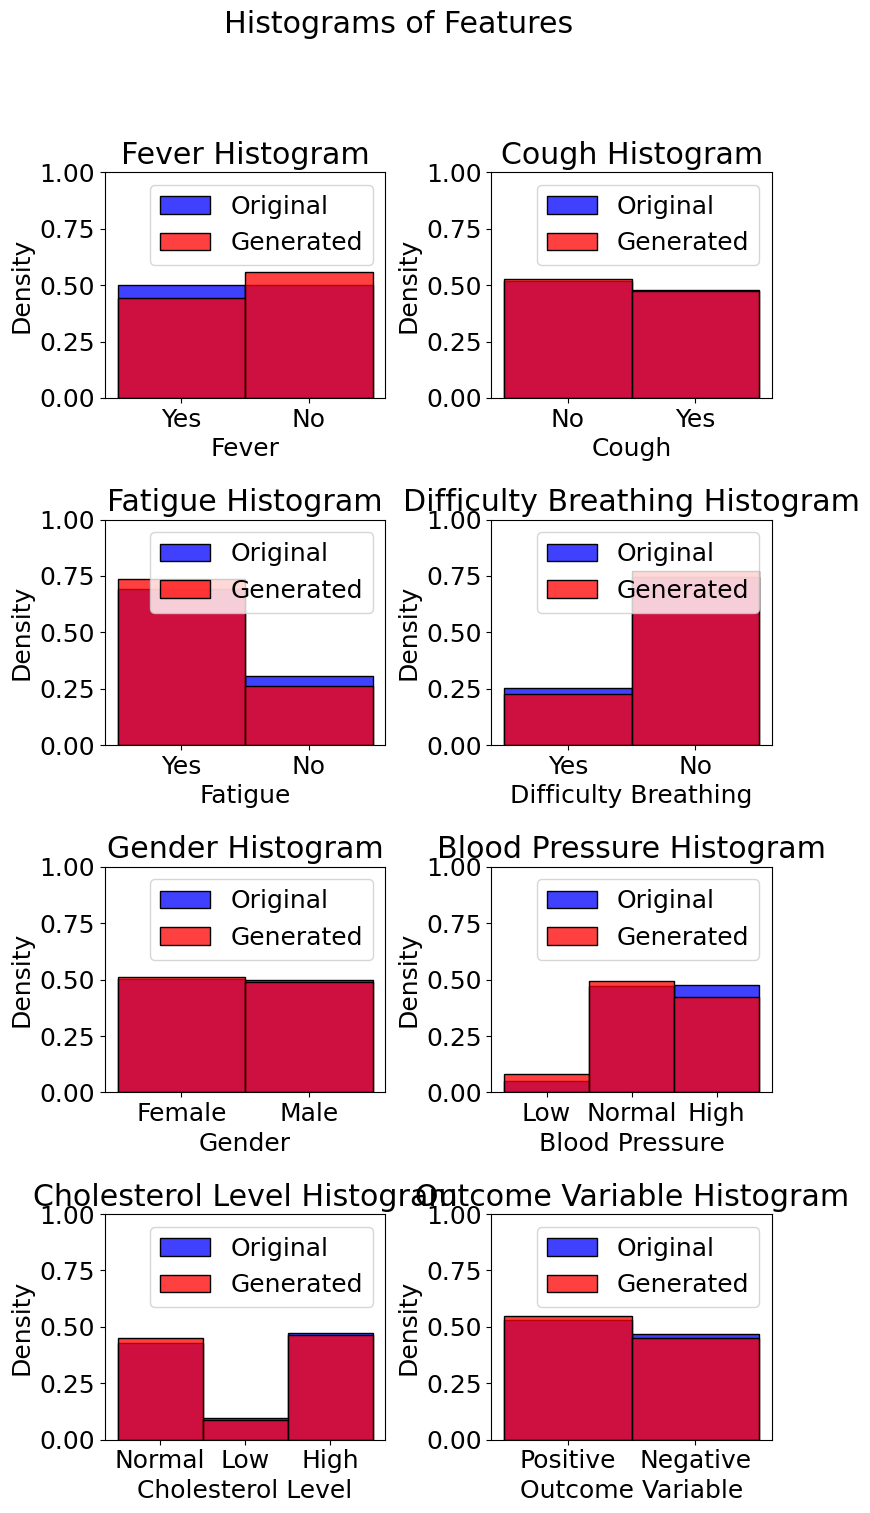

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams.update({'font.size': 18})

# Create a list of columns to exclude from the subfigures
exclude_columns = ['Age', 'Disease Category', 'Disease']

# Plot histograms for "Age" and "Disease Category" in separate figures
for col in ['Age', 'Disease Category']:
    plt.figure(figsize=(6, 4))
    if col == 'Age':
        sns.histplot(original_data[col], color='blue', bins=50, kde=True, stat='density')
        sns.histplot(generated_data[col], color='red', bins=50, kde=True, stat='density')
    else:
        sns.histplot(original_data[col], color='blue', kde=False, stat='density')
        sns.histplot(generated_data[col], color='red', kde=False, stat='density')
        plt.xticks(rotation=90)
    plt.title(f'{col} Histogram')
    plt.legend(['Original', 'Generated'])
    plt.show()

# Filter the columns to include only those not in the exclude list
columns_to_plot = [col for col in original_data.columns if col not in exclude_columns]

# Calculate the number of rows and columns for the subplots
num_plots = len(columns_to_plot)
num_cols = 2
num_rows = math.ceil(num_plots / num_cols)

# Plot subfigures for all other features
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 4 * num_rows))
fig.suptitle('Histograms of Features')

for i, col in enumerate(columns_to_plot):
    ax = axs[i // num_cols, i % num_cols]
    sns.histplot(original_data[col], color='blue', kde=False, ax=ax, stat='density')
    sns.histplot(generated_data[col], color='red', kde=False, ax=ax, stat='density')
    ax.set_title(f'{col} Histogram')
    ax.legend(['Original', 'Generated'])
    ax.set_ylim(0, 1)

# Hide any empty subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axs[j // num_cols, j % num_cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Check if the distributions of the original and generated data are the same

In [46]:
# Calculate KS statistic for the categorical column 'Age'
ks_stat, p_val = ks_2samp(original_data['Age'], generated_data['Age'])
print(f'KS Statistic for Age: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print(f'The distributions of the feature Age are different')
else:
    print(f'The distributions of the feature Age are the same')

KS Statistic for Age: 0.28735632183908044, p-value: 4.59528384301325e-13
The distributions of the feature Age are different


### Calculate the chi-square statistic and p-value for the disease categories


Chi2 Statistic for Disease: 4524.0, p-value: 3.7742163659330404e-301
The distributions of the feature Disease are different
Chi2 Statistic for Fever: 35.17690746611769, p-value: 0.0007952794795522768
The distributions of the feature Fever are different
Chi2 Statistic for Cough: 34.517124655853706, p-value: 0.0010038966557074209
The distributions of the feature Cough are different
Chi2 Statistic for Fatigue: 18.68845437880254, p-value: 0.13308445256274481
The distributions of the feature Fatigue are the same
Chi2 Statistic for Difficulty Breathing: 117.6883719854662, p-value: 5.75778276942212e-19
The distributions of the feature Difficulty Breathing are different
Chi2 Statistic for Gender: 3.181999527247921, p-value: 0.9971944846166894
The distributions of the feature Gender are the same
Chi2 Statistic for Blood Pressure: 15.105006159992874, p-value: 0.9553834341391841
The distributions of the feature Blood Pressure are the same
Chi2 Statistic for Cholesterol Level: 28.494654992053178, 

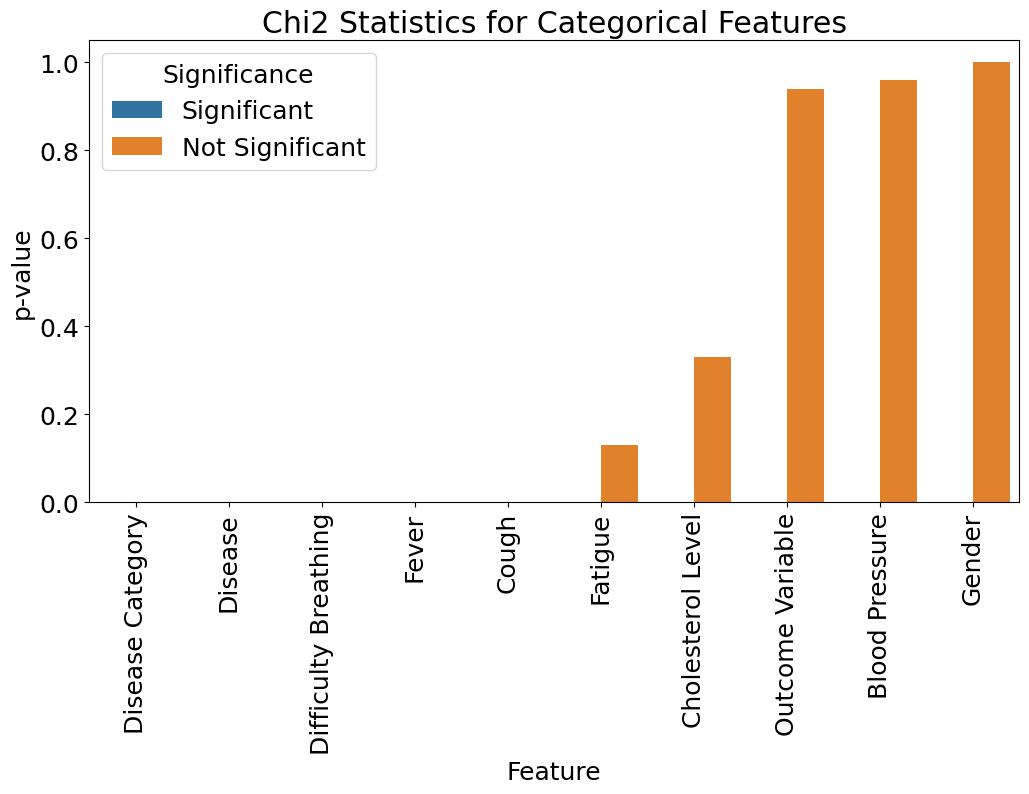

In [47]:
# Calculate the chi-square statistic for all columns except 'Age'
chi2_stats = {}
for col in original_data.columns:
    if col == 'Age':
        continue
    contingency_table = pd.crosstab(original_data[col], original_data['Disease Category'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    chi2_stats[col] = (chi2_stat, p_val)
    print(f'Chi2 Statistic for {col}: {chi2_stat}, p-value: {p_val}')
    if p_val < 0.05:
        print(f'The distributions of the feature {col} are different')
    else:
        print(f'The distributions of the feature {col} are the same')

# Plot the chi-square statistics
chi2_stats_df = pd.DataFrame(chi2_stats).T
chi2_stats_df.columns = ['Chi2 Statistic', 'p-value']
chi2_stats_df = chi2_stats_df.sort_values('p-value')
chi2_stats_df['Significance'] = chi2_stats_df['p-value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Significant')
chi2_stats_df['Chi2 Statistic'] = chi2_stats_df['Chi2 Statistic'].apply(lambda x: round(x, 2))
chi2_stats_df['p-value'] = chi2_stats_df['p-value'].apply(lambda x: round(x, 2))
chi2_stats_df = chi2_stats_df.reset_index()
chi2_stats_df = chi2_stats_df.rename(columns={'index': 'Feature'})
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='p-value', data=chi2_stats_df, hue='Significance')
plt.xticks(rotation=90)
plt.title('Chi2 Statistics for Categorical Features')
plt.show()

## Correlation comparison


### One-hot encode the 'Disease Category' column


In [48]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])

### Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns


In [49]:
# Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(original_encoded, generated_encoded)
print(f'Cosine Similarity: {cosine_sim.mean()}')

Cosine Similarity: 0.08555456467168715


### Calculate the chi-square statistic and p-value for the disease categories


In [50]:
# Calculate the chi-square statistic and p-value for the disease categories
chi2_stat, p_val, _, _ = chi2_contingency(
    pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
)

# Print the chi-square statistic and p-value
print('Chi-Square Statistic:', chi2_stat)
print('P-Value:', p_val)

Chi-Square Statistic: 157.4633585346947
P-Value: 0.7277106749053499


# Dimensionality Reduction and Visualization


## T-SNE Visualisation

d:\Program Fil\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program Fil\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
d:\Program Fil\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Program Fil\Python\Python311\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


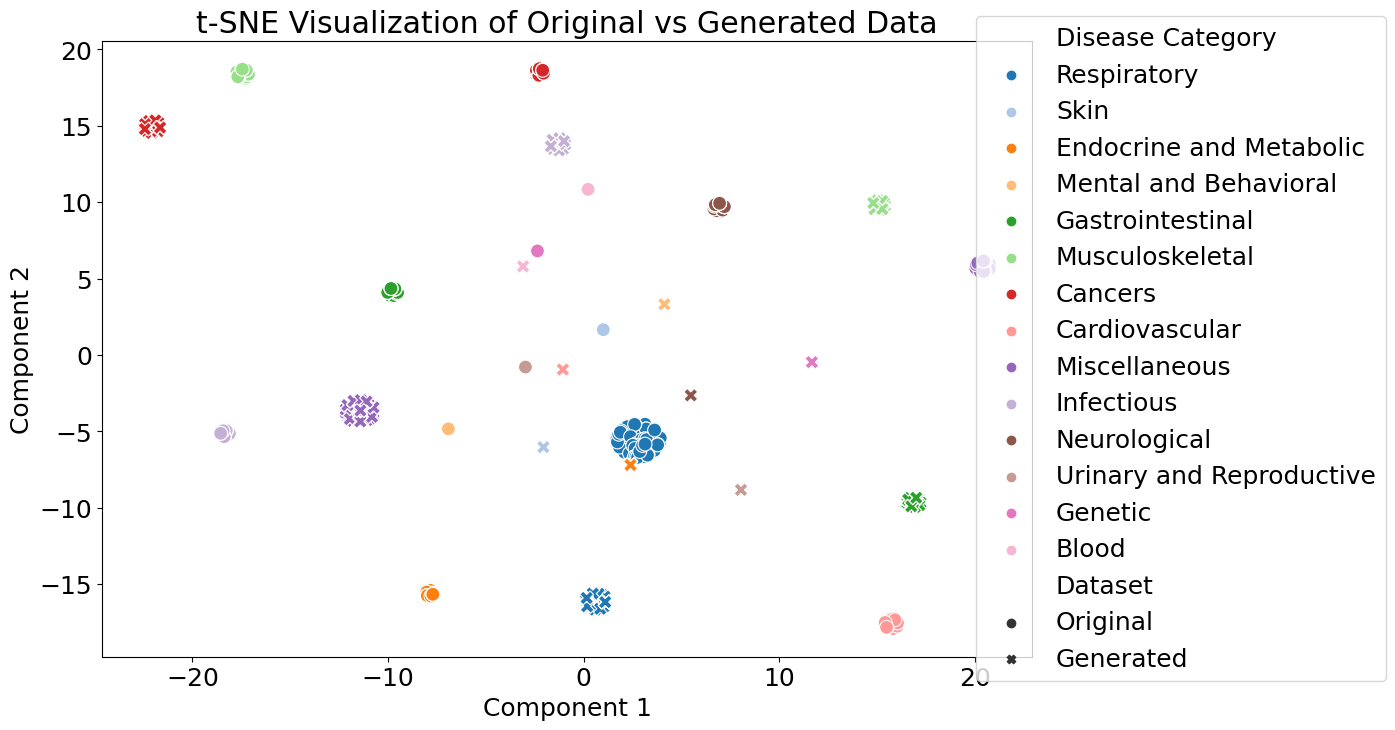

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()
